In [16]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import glob
import os
import pandas as pd

In [17]:
#to access the data
!wget https://github.com/DDEEPPP/HW3_DATA/raw/main/skulls_data.zip -p /content/gdrive
#to unzip

--2022-11-16 20:58:08--  https://github.com/DDEEPPP/HW3_DATA/raw/main/skulls_data.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DDEEPPP/HW3_DATA/main/skulls_data.zip [following]
--2022-11-16 20:58:08--  https://raw.githubusercontent.com/DDEEPPP/HW3_DATA/main/skulls_data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6262804 (6.0M) [application/zip]
Saving to: ‘github.com/DDEEPPP/HW3_DATA/raw/main/skulls_data.zip’

github.com/DDEEPPP/ 100%[===================>]   5.97M  --.-KB/s    in 0.08s   

2022-11-16 20:58:08 (78.6 MB/s) - ‘github.com/DDEEPPP/HW3_DATA/raw/main/skulls_data.zip’ sav

In [18]:
!unzip /content/github.com/DDEEPPP/HW3_DATA/raw/main/skulls_data.zip -d /content/skulls/

Archive:  /content/github.com/DDEEPPP/HW3_DATA/raw/main/skulls_data.zip
replace /content/skulls/test/horse_skull/img_01.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/skulls/test/horse_skull/img_01.jpeg  
replace /content/skulls/test/horse_skull/img_101.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace /content/skulls/test/horse_skull/img_101.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/skulls/test/horse_skull/img_101.jpeg  
  inflating: /content/skulls/test/horse_skull/img_1011.jpeg  
  inflating: /content/skulls/test/horse_skull/img_1021.jpeg  
  inflating: /content/skulls/test/horse_skull/img_1031.jpeg  
  inflating: /content/skulls/test/horse_skull/img_1041.jpeg  
  inflating: /content/skulls/test/horse_skull/img_1071.jpeg  
  inflating: /content/skulls/test/horse_skull/img_1081.jpeg  
  inflating: /content/skulls/test/horse_skull/img_11.jpeg  
  inflating: /content/skulls/test/horse_skull/img_111.jpeg  
 

Found 617 files belonging to 3 classes.
Using 611 files for training.
Found 320 files belonging to 3 classes.
Using 288 files for validation.
['horse_skull', 'human_skull', 'lion_skull']


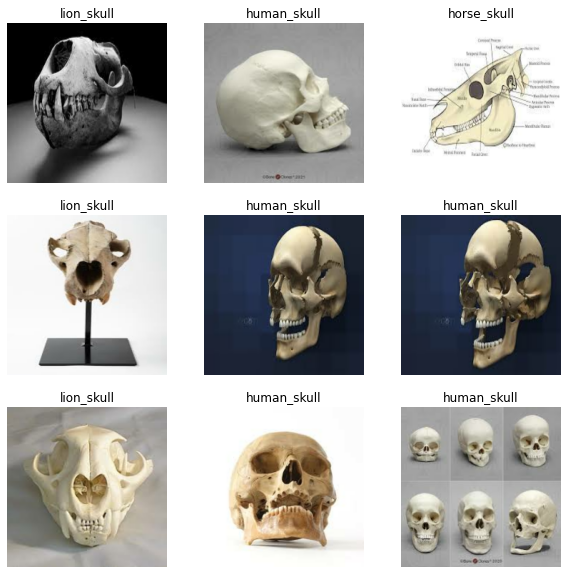

In [19]:
######################################################################
##DEEP'S CODE
# %%
import pathlib
from tensorflow import keras as K
data_dir = "/content/skulls/"
#Convert data_dir to object
data_dir = pathlib.Path(data_dir)
batch_size = 64
img_height = 224
img_width = 224


# %%
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir/'traning',
  validation_split=0.01,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir/"test",
  validation_split=0.9,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)


# %%
class_names = train_ds.class_names
print(class_names)    

# %%
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


    


In [20]:
from tensorflow import keras as K

In [49]:
#Data Augmentation
data_augmentation = K.Sequential(
    [
        K.layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
        K.layers.experimental.preprocessing.RandomRotation(0.1),
        K.layers.experimental.preprocessing.RandomZoom(0.1),
    ]
    
)
resnet = K.applications.ResNet50V2(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))
for layer in resnet.layers[:-10]:
    layer.trainable = False
    
#Model
opt = tf.keras.optimizers.Adam(learning_rate = 0.0001)
model = K.Sequential([
    K.layers.Rescaling(scale=1 / 127.5, offset=-1),
    data_augmentation,
    resnet,
    K.layers.Flatten(),
    K.layers.Dense(3, activation='softmax')
])

#Compile
model.compile(optimizer=opt,
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

#Train
history = model.fit(train_ds,validation_data=val_ds,epochs=10)


Epoch 1/10
10/10 [==============================] - 8s 419ms/step - loss: 1.1828 - accuracy: 0.5990 - val_loss: 0.4003 - val_accuracy: 0.8785
Epoch 2/10
10/10 [==============================] - 4s 329ms/step - loss: 0.3454 - accuracy: 0.8822 - val_loss: 0.5056 - val_accuracy: 0.8750
Epoch 3/10
10/10 [==============================] - 4s 332ms/step - loss: 0.1798 - accuracy: 0.9214 - val_loss: 0.3357 - val_accuracy: 0.9271
Epoch 4/10
10/10 [==============================] - 4s 336ms/step - loss: 0.1144 - accuracy: 0.9525 - val_loss: 0.3830 - val_accuracy: 0.9062
Epoch 5/10
10/10 [==============================] - 4s 339ms/step - loss: 0.1037 - accuracy: 0.9591 - val_loss: 0.3539 - val_accuracy: 0.9167
Epoch 6/10
10/10 [==============================] - 4s 340ms/step - loss: 0.0873 - accuracy: 0.9787 - val_loss: 0.2781 - val_accuracy: 0.9201
Epoch 7/10
10/10 [==============================] - 4s 343ms/step - loss: 0.0720 - accuracy: 0.9787 - val_loss: 0.3661 - val_accuracy: 0.9097
Epoch 

In [50]:
model.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_22 (Rescaling)    (None, 224, 224, 3)       0         
                                                                 
 sequential_43 (Sequential)  (None, 224, 224, 3)       0         
                                                                 
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 flatten_22 (Flatten)        (None, 100352)            0         
                                                                 
 dense_23 (Dense)            (None, 3)                 301059    
                                                                 
Total params: 23,865,859
Trainable params: 3,717,123
Non-trainable params: 20,148,736
_________________________________________________________________


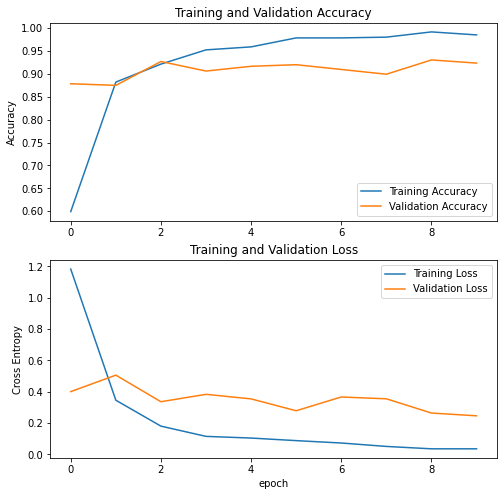

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
#plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

2/2 [==============================] - 0s 113ms/step


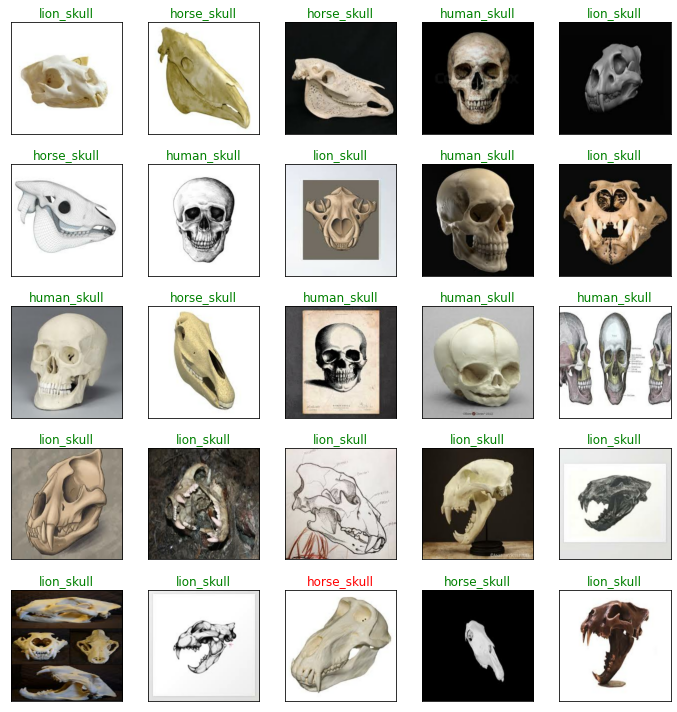

In [55]:
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  predictions = model.predict(images)
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)

    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i].numpy().astype("uint8"))
    predicted_label = np.argmax(predictions[i])
    true_label = labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.title("{}".format(class_names[predicted_label]),
                                    color=color)
    plt.tight_layout()
